# Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

### Задание 1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки. Визуализируйте несколько изображений из датасета. Произведите нормализацию данных. 


*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import Adam, SGD
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [2]:
tf.keras.datasets.cifar100.load_data(label_mode="fine")

((array([[[[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [195, 205, 193],
           [212, 224, 204],
           [182, 194, 167]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [254, 254, 254],
           ...,
           [170, 176, 150],
           [161, 168, 130],
           [146, 154, 113]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [255, 255, 255],
           ...,
           [189, 199, 169],
           [166, 178, 130],
           [121, 133,  87]],
  
          ...,
  
          [[148, 185,  79],
           [142, 182,  57],
           [140, 179,  60],
           ...,
           [ 30,  17,   1],
           [ 65,  62,  15],
           [ 76,  77,  20]],
  
          [[122, 157,  66],
           [120, 155,  58],
           [126, 160,  71],
           ...,
           [ 22,  16,   3],
           [ 97, 112,  56],
           [141, 161,  87]],
  
          [[ 87, 122,  41],
           [ 8

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

In [4]:
print(x_train.shape,
y_train.shape,
x_test.shape,
y_test.shape,
sep = '\n')

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


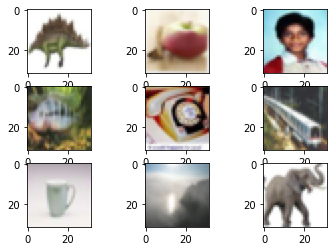

In [5]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(x_train[i])
 
plt.show()

In [6]:
x_train = np.array(x_train, dtype="float") / 255.0
x_test = np.array(x_test, dtype="float") / 255.0

In [7]:
y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)

### Задание 2. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout(). 

Имя данной модели: model_1

In [13]:
model_1 = keras.Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(100,  activation='softmax')
])

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 256)       

Обучите созданную модель

In [14]:
EPOCH_1 = 30
opt = Adam(learning_rate = 0.001)

model_1.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_1_history = model_1.fit(x_train, y_train, batch_size=2000, epochs=EPOCH_1, verbose=1, validation_data=(x_test,y_test))

Epoch 1/30
25/25 [==============================] - 5s 163ms/step - loss: 4.3099 - accuracy: 0.0517 - val_loss: 3.9443 - val_accuracy: 0.1031
Epoch 2/30
25/25 [==============================] - 3s 134ms/step - loss: 3.7181 - accuracy: 0.1446 - val_loss: 3.5202 - val_accuracy: 0.1774
Epoch 3/30
25/25 [==============================] - 3s 136ms/step - loss: 3.3842 - accuracy: 0.2017 - val_loss: 3.3341 - val_accuracy: 0.2108
Epoch 4/30
25/25 [==============================] - 4s 152ms/step - loss: 3.1470 - accuracy: 0.2473 - val_loss: 3.1433 - val_accuracy: 0.2552
Epoch 5/30
25/25 [==============================] - 4s 142ms/step - loss: 2.9419 - accuracy: 0.2829 - val_loss: 2.9650 - val_accuracy: 0.2846
Epoch 6/30
25/25 [==============================] - 3s 136ms/step - loss: 2.7637 - accuracy: 0.3202 - val_loss: 2.8398 - val_accuracy: 0.3064
Epoch 7/30
25/25 [==============================] - 3s 136ms/step - loss: 2.6324 - accuracy: 0.3476 - val_loss: 2.7451 - val_accuracy: 0.3301
Epoch 

### Задание 3. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization(). 

Имя данной модели: model_2

In [8]:
model_2 = keras.Sequential([
    Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2), strides=2),
    # BatchNormalization(),
    Conv2D(128, (3, 3), padding='same'),
    MaxPooling2D((2, 2), strides=2),
    BatchNormalization(),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    # BatchNormalization(),
    Flatten(),
    # BatchNormalization(),
    Dense(512, activation='relu'),
    Dense(100,  activation='softmax')
])

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 128)        512       
 ormalization)                                                   
                                                        

Обучите созданную модель

In [9]:
batch_size = 2000
EPOCH_2 = 30

In [10]:
opt = Adam(learning_rate = 0.0001)
model_2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_2_history = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=EPOCH_2, verbose=1, validation_data=(x_test, y_test))

Epoch 1/30
25/25 [==============================] - 17s 157ms/step - loss: 4.2272 - accuracy: 0.0741 - val_loss: 4.5246 - val_accuracy: 0.0394
Epoch 2/30
25/25 [==============================] - 3s 137ms/step - loss: 3.6612 - accuracy: 0.1629 - val_loss: 4.4570 - val_accuracy: 0.0834
Epoch 3/30
25/25 [==============================] - 3s 140ms/step - loss: 3.3831 - accuracy: 0.2104 - val_loss: 4.3973 - val_accuracy: 0.1397
Epoch 4/30
25/25 [==============================] - 4s 142ms/step - loss: 3.1897 - accuracy: 0.2461 - val_loss: 4.3340 - val_accuracy: 0.1838
Epoch 5/30
25/25 [==============================] - 3s 140ms/step - loss: 3.0385 - accuracy: 0.2749 - val_loss: 4.2587 - val_accuracy: 0.2227
Epoch 6/30
25/25 [==============================] - 3s 139ms/step - loss: 2.9085 - accuracy: 0.3018 - val_loss: 4.1842 - val_accuracy: 0.2439
Epoch 7/30
25/25 [==============================] - 4s 141ms/step - loss: 2.7966 - accuracy: 0.3241 - val_loss: 4.1014 - val_accuracy: 0.2522
Epoch

### Задание 4. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout(). 

Имя данной модели: model_3

In [15]:
model_3 = keras.Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(100,  activation='softmax')
])

model_3.summary()

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 256)       

Обучите созданную модель

In [16]:
batch_size = 2000
EPOCH_3 = 30

In [17]:
model_3_history = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=EPOCH_3, verbose=1, validation_data=(x_test, y_test))

Epoch 1/30
25/25 [==============================] - 6s 163ms/step - loss: 4.3933 - accuracy: 0.0364 - val_loss: 4.0855 - val_accuracy: 0.0895
Epoch 2/30
25/25 [==============================] - 3s 139ms/step - loss: 3.8965 - accuracy: 0.1080 - val_loss: 3.5957 - val_accuracy: 0.1718
Epoch 3/30
25/25 [==============================] - 3s 135ms/step - loss: 3.5556 - accuracy: 0.1640 - val_loss: 3.3241 - val_accuracy: 0.2189
Epoch 4/30
25/25 [==============================] - 3s 138ms/step - loss: 3.3325 - accuracy: 0.2026 - val_loss: 3.1364 - val_accuracy: 0.2491
Epoch 5/30
25/25 [==============================] - 3s 140ms/step - loss: 3.1310 - accuracy: 0.2361 - val_loss: 2.9573 - val_accuracy: 0.2827
Epoch 6/30
25/25 [==============================] - 3s 139ms/step - loss: 3.0052 - accuracy: 0.2594 - val_loss: 2.8567 - val_accuracy: 0.3040
Epoch 7/30
25/25 [==============================] - 3s 136ms/step - loss: 2.8599 - accuracy: 0.2896 - val_loss: 2.7618 - val_accuracy: 0.3264
Epoch 

### Задание 5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [18]:
model_4 = keras.Sequential([
    Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3, 3), padding='same'),
    MaxPooling2D((2, 2), strides=2),
    BatchNormalization(),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(100,  activation='softmax')
])

opt = Adam(learning_rate = 0.001)

model_4.summary()

model_4.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 128)        512       
 hNormalization)                                                 
                                                      

Обучите созданную модель

In [19]:
batch_size = 2000
EPOCH_4 = 30

In [20]:
model_4_history = model_4.fit(x_train, y_train, batch_size=batch_size, epochs=EPOCH_4, verbose=1, validation_data=(x_test, y_test))

Epoch 1/30
25/25 [==============================] - 5s 165ms/step - loss: 4.4706 - accuracy: 0.0454 - val_loss: 4.5496 - val_accuracy: 0.0352
Epoch 2/30
25/25 [==============================] - 4s 140ms/step - loss: 3.9171 - accuracy: 0.1082 - val_loss: 4.4789 - val_accuracy: 0.0890
Epoch 3/30
25/25 [==============================] - 3s 140ms/step - loss: 3.5567 - accuracy: 0.1615 - val_loss: 4.4267 - val_accuracy: 0.1040
Epoch 4/30
25/25 [==============================] - 4s 141ms/step - loss: 3.3056 - accuracy: 0.2008 - val_loss: 4.3920 - val_accuracy: 0.1550
Epoch 5/30
25/25 [==============================] - 4s 141ms/step - loss: 3.1209 - accuracy: 0.2358 - val_loss: 4.3741 - val_accuracy: 0.1323
Epoch 6/30
25/25 [==============================] - 3s 139ms/step - loss: 2.9335 - accuracy: 0.2685 - val_loss: 4.3350 - val_accuracy: 0.1900
Epoch 7/30
25/25 [==============================] - 4s 141ms/step - loss: 2.7905 - accuracy: 0.2991 - val_loss: 4.2999 - val_accuracy: 0.1754
Epoch 

### Задание 5. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель

In [11]:
def graph(his, EPOCH):
    N = np.arange(0, EPOCH)
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(N, his.history["loss"], label="train_loss")
    plt.plot(N, his.history["val_loss"], label="val_loss")
    plt.plot(N, his.history["accuracy"], label="train_accuracy")
    plt.plot(N, his.history["val_accuracy"], label="val_accuracy")
    plt.title("Training Loss and Accuracy (Simple NN)")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

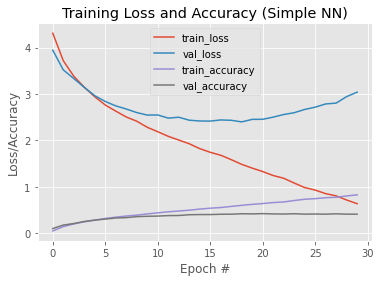

In [21]:
graph(model_1_history, EPOCH_1)

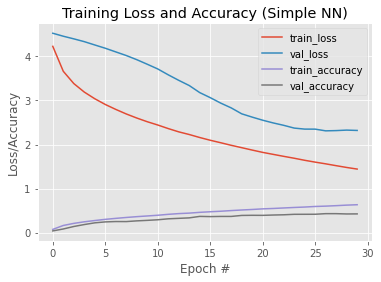

In [22]:
graph(model_2_history, EPOCH_2)

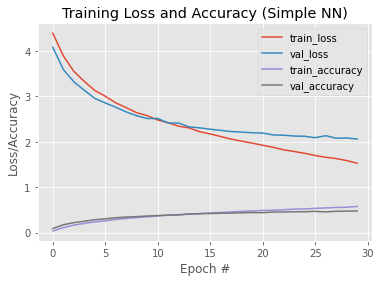

In [23]:
graph(model_3_history, EPOCH_3)

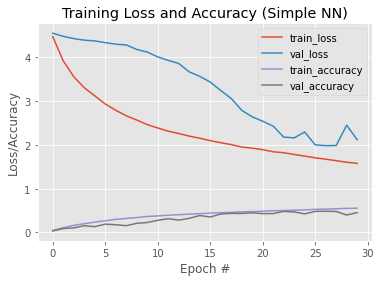

In [24]:
graph(model_4_history, EPOCH_4)

Ваши выводы

### При условии, что я оставляю практически неизменными все сверточные слои, то:

### 1) У model_1 количество эпох (для норм. обучения) = 10, 
loss: 2.2842 - accuracy: 0.4183 - val_loss: 2.5471 - val_accuracy: 0.3668
### 2) У model_2 и количество эпох (для норм. обучения) = 19,
loss: 1.9281 - accuracy: 0.5141 - val_loss: 2.6963 - val_accuracy: 0.3908 
### 3) У model_3 и количество эпох (для норм. обучения) = 25,
loss: 1.7468 - accuracy: 0.5208 - val_loss: 2.1228 - val_accuracy: 0.4585
### 4) У model_4 и количество эпох (для норм. обучения) = 22,
loss: 1.8426 - accuracy: 0.4962 - val_loss: 2.4282 - val_accuracy: 0.4323


Ваш итог

### Наиболее удачной является model_3, к которой применен только параметр dropout